K-Means Clustering is an unsupervised machine learning algorithm that divides data into K groups (clusters). Within each cluster, the data points are more similar to each other, while they are less similar to data points in other clusters.

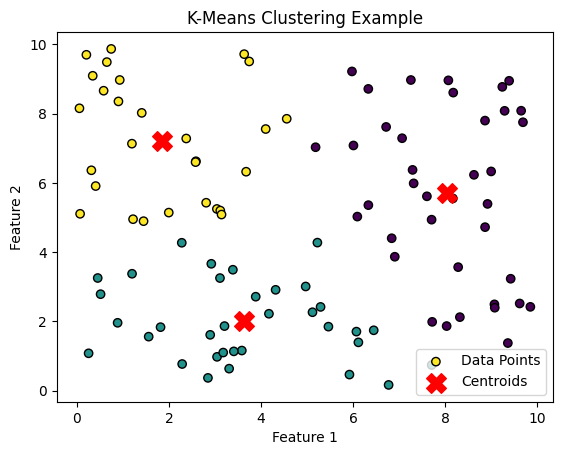

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Create some random data points
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 points with 2 features (x, y)

# Step 2: Apply K-Means Clustering (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_  # Cluster labels for each point
centroids = kmeans.cluster_centers_  # Center points of clusters

# Step 3: Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k', label="Data Points")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.legend()
plt.title("K-Means Clustering Example")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


<ipython-input-2-8af9d42d1d62>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


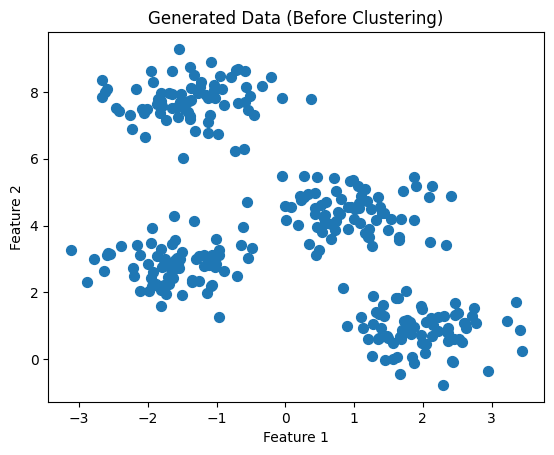

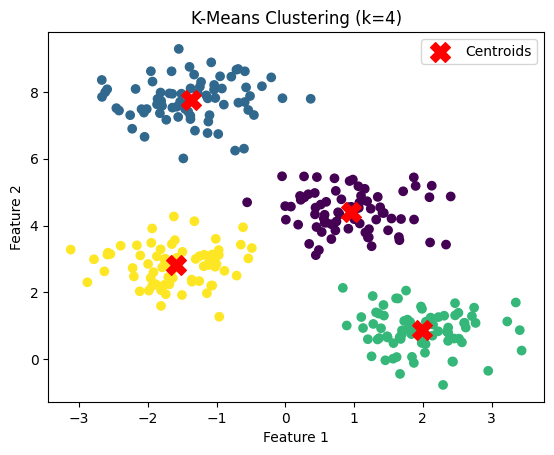

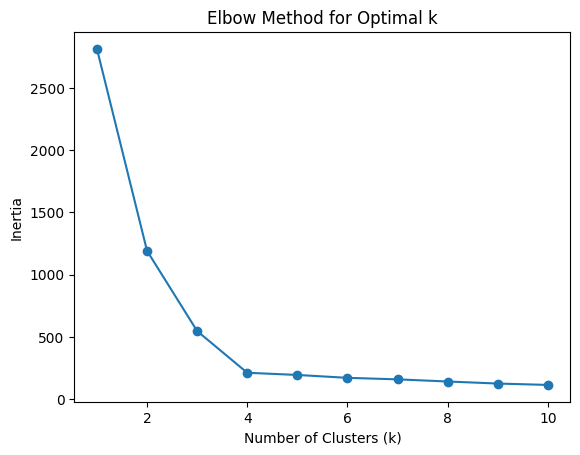

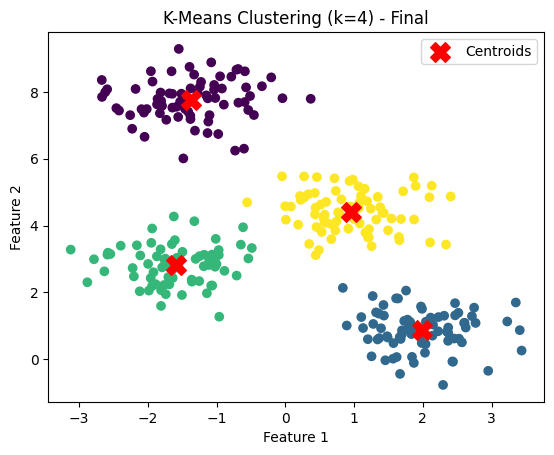

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Step 1: Generate a synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualizing the generated dataset
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Generated Data (Before Clustering)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 2: Apply K-Means Clustering with k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Step 3: Get the centroids and labels
centers = kmeans.cluster_centers_  # Centroids of the clusters
labels = kmeans.labels_  # Labels for each data point (which cluster each point belongs to)

# Step 4: Visualize the Clustering Result
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Step 5: Elbow Method to find the optimal value of k
inertia = []  # List to store inertia values
k_range = range(1, 11)  # Checking for k=1 to k=10

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia (sum of squared distances to the centroids)

# Plot the inertia values to visualize the Elbow method
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 6: Choose the optimal k (Based on the elbow plot, let's say k=4)
optimal_k = 4

# Apply K-Means again with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k)
kmeans_optimal.fit(X)
labels_optimal = kmeans_optimal.labels_
centers_optimal = kmeans_optimal.cluster_centers_

# Visualize the final clustering result
plt.scatter(X[:, 0], X[:, 1], c=labels_optimal, cmap='viridis')
plt.scatter(centers_optimal[:, 0], centers_optimal[:, 1], s=200, c='red', marker='X', label="Centroids")
plt.title(f"K-Means Clustering (k={optimal_k}) - Final")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [ ]:
### https://www.youtube.com/watch?v=iIaClHApAjQ
###https://www.youtube.com/watch?v=AaUMof6f5o8
### https://www.youtube.com/watch?v=neoJFF_ZmYE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Score,0


In [ ]:
df.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


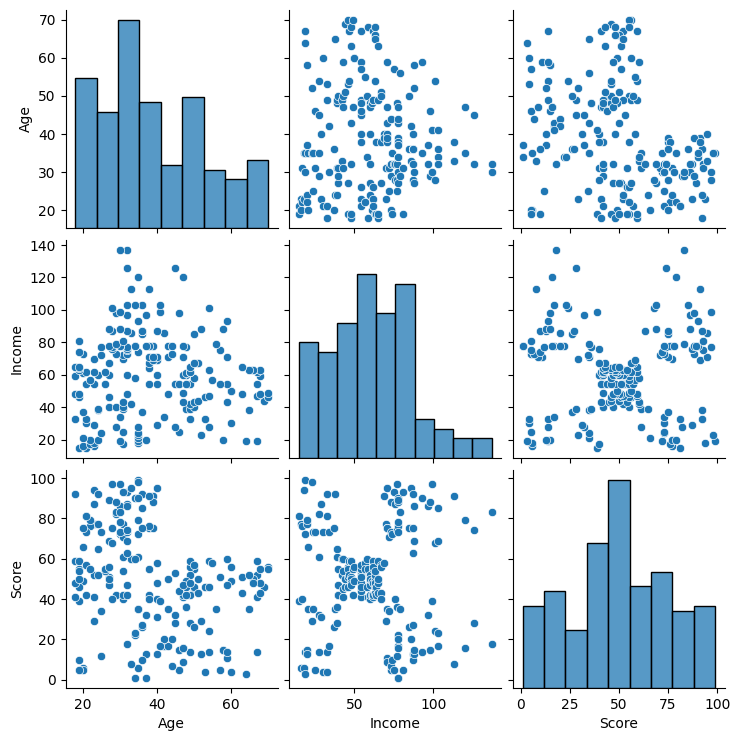

In [ ]:
sns.pairplot(df[['Age','Income','Score']])

In [ ]:
import  sklearn.cluster as cluster

In [ ]:
kmeans = cluster.KMeans(n_clusters=5,random_state=42)

In [ ]:
kmeans = kmeans.fit(df[['Income','Score']])

In [ ]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [ ]:
df['income_clusters'] = kmeans.labels_

In [ ]:
df

,CustomerID,Gender,Age,Income,Score,income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [ ]:
df['income_clusters'].value_counts()

,count
income_clusters,
0,81
1,39
3,35
4,23
2,22


<Axes: xlabel='Income', ylabel='Score'>

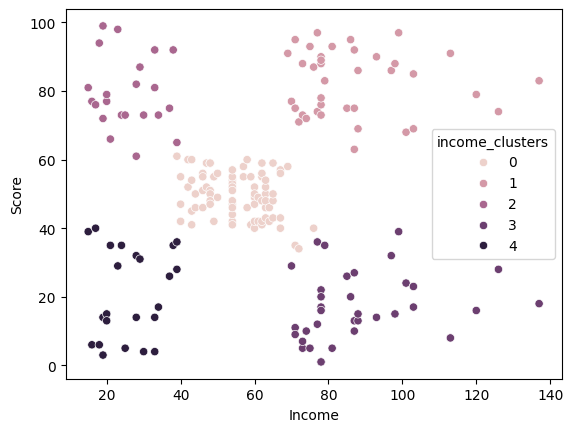

In [ ]:
sns.scatterplot(data=df,x='Income',y='Score',hue='income_clusters')


In [ ]:
kmeans = cluster.KMeans(n_clusters=2 ,random_state=42)

In [ ]:
kmeans = kmeans.fit(df[['Age','Score']])

In [ ]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [ ]:
df['age_clusters'] = kmeans.labels_

In [ ]:
df.head()

,CustomerID,Gender,Age,Income,Score,income_clusters,age_clusters
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,4,1
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,4,1


<Axes: xlabel='Age', ylabel='Score'>

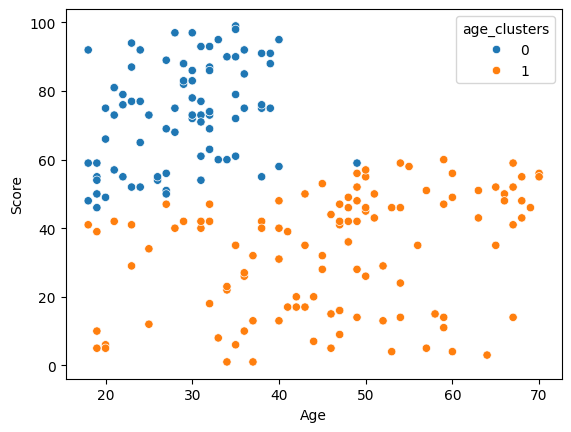

In [ ]:
sns.scatterplot(data=df,x='Age',y='Score',hue='age_clusters')

In [ ]:
from sklearn.cluster import KMeans

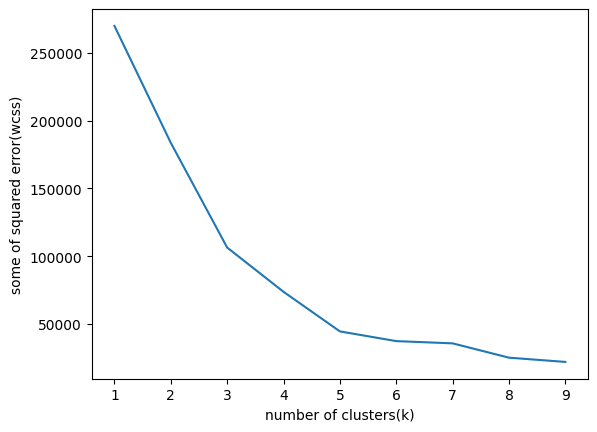

In [ ]:
k_range = range(1,10)
wcss = []

for k in k_range:
    km = KMeans(n_clusters=k) # Using 'km' instead of 'kmeans' to avoid overwriting the previous model
    km.fit(df[['Income','Score']])
    wcss.append(km.inertia_) # Appending inertia from 'km'

plt.xlabel('number of clusters(k)')
plt.ylabel('some of squared error(wcss)')
plt.plot(k_range,wcss)
plt.show()

In [ ]:
wcss

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37271.88623658948,
 35620.04757113041,
 25050.832307547524,
 21913.929201194416]

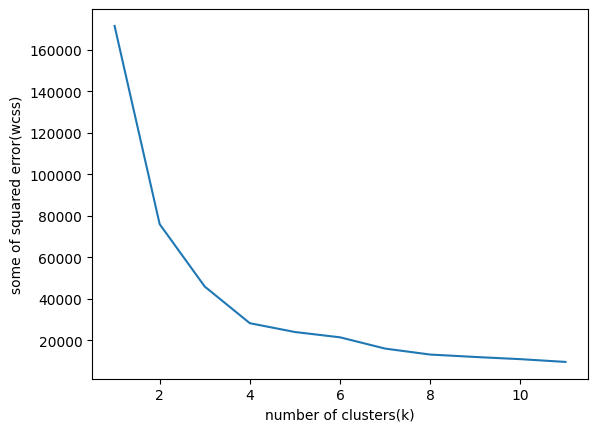

In [ ]:
k_range = range(1,12)
wcss = []

for k in k_range:
    km = KMeans(n_clusters=k) # Using 'km' instead of 'kmeans' to avoid overwriting the previous model
    km.fit(df[['Age','Score',]])
    wcss.append(km.inertia_) # Appending inertia from 'km'

plt.xlabel('number of clusters(k)')
plt.ylabel('some of squared error(wcss)')
plt.plot(k_range,wcss)
plt.show()

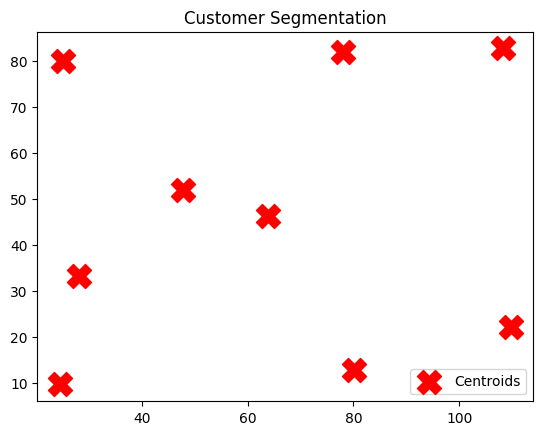

In [ ]:
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s = 300,
    c = 'red',
    marker = 'X',
    label = 'Centroids')
plt.title("Customer Segmentation")
plt.legend()
plt.show()

In [ ]:
clusters_summary = df.groupby('income_clusters') [['Income','Score']].mean().round(1)

interpretation = [
    "Average Spendesr (Medium Income, Medium Spending)",
    "High-Value Targets (High Income, High Spending)",
    "Carefree Spenders (Low Income, High Spending)",
    "Rich But Frugal (High Income, Low Spending)",
    "Budget-Conscious (Low Income, Low Spending)",
]

clusters_summary['interpretation']  = interpretation
clusters_summary = clusters_summary.reset_index()
clusters_summary

,income_clusters,Income,Score,interpretation
0,0,55.3,49.5,"Average Spendesr (Medium Income, Medium Spending)"
1,1,86.5,82.1,"High-Value Targets (High Income, High Spending)"
2,2,25.7,79.4,"Carefree Spenders (Low Income, High Spending)"
3,3,88.2,17.1,"Rich But Frugal (High Income, Low Spending)"
4,4,26.3,20.9,"Budget-Conscious (Low Income, Low Spending)"
